# step 1: **Data Preprocessing**

## **Encoding Categorical Values**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("csvs/car_price_dataset.csv")

# One-Hot Encoding for categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(df[['Brand', 'Model', 'Fuel_Type', 'Transmission']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

'''
1. We create an instance of the OneHotEncoder class. The handle_unknown='ignore' parameter
tells the encoder to ignore any new categories that were not seen during training.
The sparse_output=False parameter ensures that the output is a dense NumPy array instead of a sparse matrix.

2. We use the fit_transform method on the encoder with double square brackets to select
multiple columns ('Brand', 'Model', 'Fuel_Type', and 'Transmission').
Double square brackets are used because single square brackets would return
a Series for a single column, but we need a DataFrame to encode multiple columns.

3. We create a DataFrame from the encoded data using pd.DataFrame.
The get_feature_names_out() method returns a list of all the new one-hot encoded column names.
'''

# Concatenate encoded features and drop original categorical columns
df = pd.concat([df, encoded_df], axis=1).drop(['Brand', 'Fuel_Type', 'Model', 'Transmission'], axis=1)
print(df)



      Year  Engine_Size  Mileage  Doors  Owner_Count  Price  Brand_Audi  \
0     2020          4.2   289944      3            5   8501         0.0   
1     2012          2.0     5356      2            3  12092         0.0   
2     2020          4.2   231440      4            2  11171         0.0   
3     2023          2.0   160971      2            1  11780         1.0   
4     2003          2.6   286618      3            3   2867         0.0   
...    ...          ...      ...    ...          ...    ...         ...   
9995  2004          3.7     5794      2            4   8884         0.0   
9996  2002          1.4   168000      2            1   6240         0.0   
9997  2010          3.0    86664      5            1   9866         0.0   
9998  2002          1.4   225772      4            1   4084         0.0   
9999  2001          2.1   157882      3            3   3342         0.0   

      Brand_BMW  Brand_Chevrolet  Brand_Ford  ...  Model_Tiguan  Model_Tucson  \
0           0.0   

## Splitting Data

In [2]:
x = df.drop('Price', axis=1)
y = df['Price']

scaler = StandardScaler()
x = scaler.fit_transform(x)
print("Null values are:\n",df.isnull().sum())




Null values are:
 Year                           0
Engine_Size                    0
Mileage                        0
Doors                          0
Owner_Count                    0
Price                          0
Brand_Audi                     0
Brand_BMW                      0
Brand_Chevrolet                0
Brand_Ford                     0
Brand_Honda                    0
Brand_Hyundai                  0
Brand_Kia                      0
Brand_Mercedes                 0
Brand_Toyota                   0
Brand_Volkswagen               0
Model_3 Series                 0
Model_5 Series                 0
Model_A3                       0
Model_A4                       0
Model_Accord                   0
Model_C-Class                  0
Model_CR-V                     0
Model_Camry                    0
Model_Civic                    0
Model_Corolla                  0
Model_E-Class                  0
Model_Elantra                  0
Model_Equinox                  0
Model_Explorer           

## Plotting

In [3]:

# Scatter plot of each feature vs Price

for column in df.columns:
    if column != 'Price':  
        plt.figure(figsize=(10, 6))
        plt.scatter(df[column], df['Price'], alpha=0.5)
        plt.title(f'Scatter Plot of {column} vs Price')
        plt.xlabel(column)
        plt.ylabel('Price')
        plt.grid(True)
        plt.show()


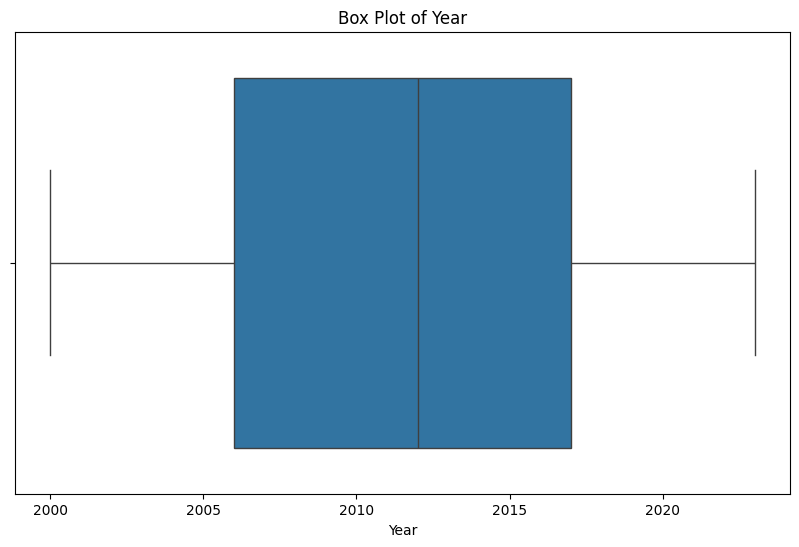

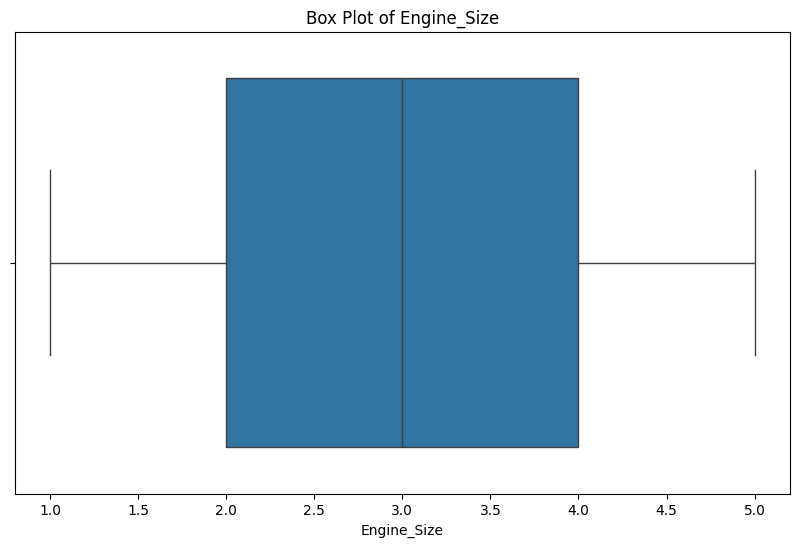

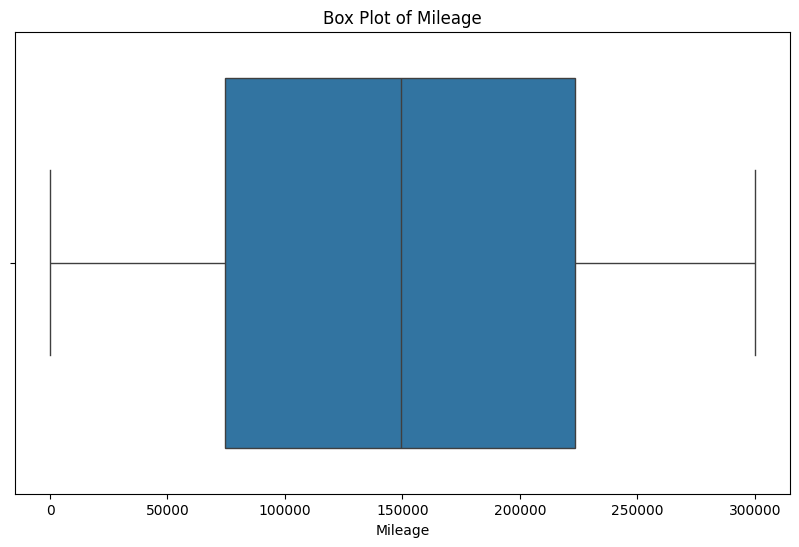

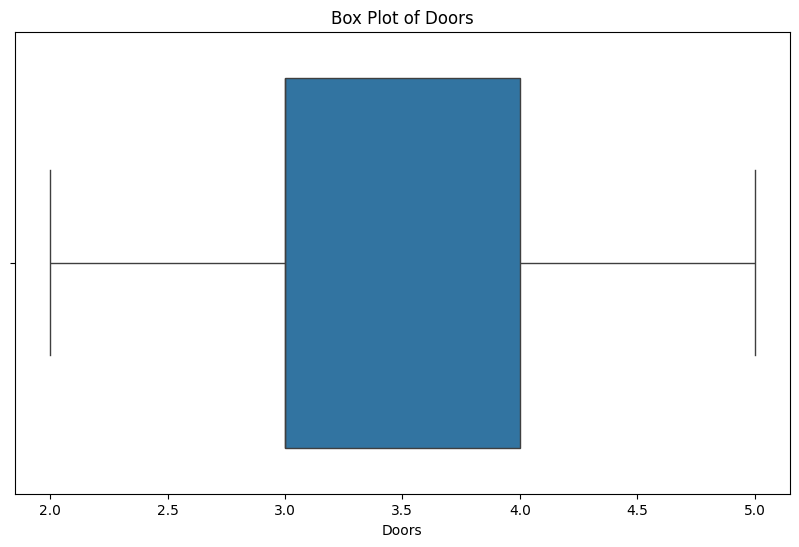

In [4]:
# Box plot to find outliers
import seaborn as sns
for column in ["Year","Engine_Size","Mileage","Doors"]:
    if column != 'Price':  
        plt.figure(figsize=(10, 6))
        sns.boxplot(x = df[column])
        plt.title(f"Box Plot of {column}")
        plt.xlabel(f"{column}")
        plt.show()


# Fitting the model with linear regression

In [5]:

# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(x_train, y_train)

# Evaluate Model
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: ${mse:.2f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error: $4213.92
R-squared: 0.9995


# Taking User Input

In [6]:
# User Input
brand = input("Enter Car Brand: ").lower()
modell = input("Enter Car Model: ").lower()
year = int(input("Enter Year: "))
engine_size = float(input("Enter Engine Size (cc): "))
fuel_type = input("Enter Fuel Type: ").lower()
transmission = input("Enter Transmission Type: ").lower()
mileage = float(input("Enter Mileage (km): "))
doors = int(input("Enter Number of Doors: "))
owner_count = int(input("Enter Owner Count: "))

# Preprocess User Input
input_data = pd.DataFrame([[brand, modell, fuel_type, transmission, year, mileage, engine_size, doors, owner_count]], 
                          columns=['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Year', 'Mileage', 'Engine_Size', 'Doors', 'Owner_Count'])
print(input_data)
# Transform input using the same encoder
encoded_input = encoder.transform(input_data[['Brand', 'Model', 'Fuel_Type', 'Transmission']])
encoded_input_df = pd.DataFrame(encoded_input, columns=encoder.get_feature_names_out())

# Merge with numerical features
final_input = pd.concat([encoded_input_df, input_data[['Year', 'Mileage', 'Engine_Size', 'Doors', 'Owner_Count']]], axis=1)

# Ensure the columns are in the same order as the training data
final_input = final_input.reindex(columns=df.drop('Price', axis=1).columns, fill_value=0)

# Final scaled input data
final_scaled_input = scaler.transform(final_input)


# --- Predict Price ---
predicted_price = model.predict(final_scaled_input)
print(f"\nPredicted Car Price: ${predicted_price[0]:,.2f}")

  Brand Model Fuel_Type Transmission  Year   Mileage  Engine_Size  Doors  \
0   kia   rio    diesel       manual  2020  289944.0          4.2      3   

   Owner_Count  
0            5  

Predicted Car Price: $9,765.64
